In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
# pd.set_option('display.max_rows',None)

Mounted at /content/drive


In [37]:
df_test = pd.read_csv('/content/drive/MyDrive/Colab minipro 4 /Permodelan data Home Credit Indonesia/Data HCI/df_test.csv')
df_train = pd.read_csv('/content/drive/MyDrive/Colab minipro 4 /Permodelan data Home Credit Indonesia/Data HCI/df_train.csv')

In [38]:
# Cross cek jumlah data yang dimiliki
print('Jumlah data Train :', df_train.shape)
print('Jumlah data Test :', df_test.shape)

# Setelah dilakukan pengecekan data yang dimiliki tidak terdapat data missing
# Selisih persentase antara data train dengan test sebesar 50% dengan begitu saya akan melakukakan analisa pada data train
# Apakah data train memiliki Class imbalance jika YA maka kemungkinan besar saya akan menggunakan oversampling untuk menyeimbangkan
# Persentase antara data train dan test (Note Selisih Train dan Test = 70:30)

print('****'*12)
print('Jumlah kolom data duplicate pada df_train :',df_train.duplicated().sum())
print('Jumlah kolom data duplicate pada df_test :',df_test.duplicated().sum())

# Terdapat data duplikat berdasarkan baris, hal ini kurang baik dikarenakan ketik akan dilakukan permodelan maka model akan berkinerja baik namun
# model yang sudah dibuat bersifat overfitting dikarenakan model mudah mempelajari pola data akibat data yang duplikat. Maka dalam hal ini saya akan
# melakukan penghapusan data duplikat tersebut.

print('****'*12)
print('Jumlah ID data duplicate pada df_train :',df_train.duplicated('SK_ID_CURR').sum())
print('Jumlah ID data duplicate pada df_test :',df_test.duplicated('SK_ID_CURR').sum())

# Dari hasil analisa ditemukan bahwa key dari SK_ID_CURR memiliki data duplikat maka perlu analisa lebih lanjut untuk mengetahui penyebab duplikat tersebut

print('****'*12)



Jumlah data Train : (336846, 98)
Jumlah data Test : (182144, 97)
************************************************
Jumlah kolom data duplicate pada df_train : 28547
Jumlah kolom data duplicate pada df_test : 14857
************************************************
Jumlah ID data duplicate pada df_train : 328117
Jumlah ID data duplicate pada df_test : 177581
************************************************


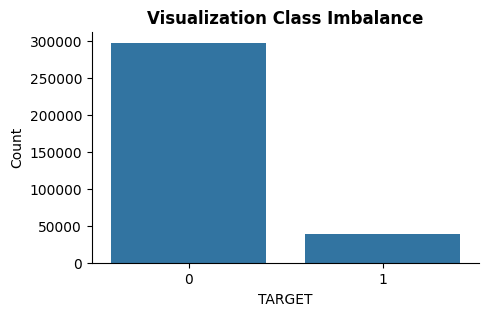

In [4]:
# @title Visualization Class Imbalance
plt.figure(figsize=(5,3))
target=df_train['TARGET'].value_counts().reset_index()
target.columns = ['TARGET', 'count']
sns.barplot(x='TARGET',y='count',data=target,orient='v')
plt.title("Visualization Class Imbalance",fontweight='bold')
plt.xlabel("TARGET")
plt.ylabel("Count")
plt.gca().spines[['top','right']].set_visible(False)
plt.show()


## Data Prepocessing

In [39]:
# melakukan penghapusan data duplikat berdasarkan baris
train = df_train.drop_duplicates()
test = df_test.drop_duplicates()

# Cross cek ulang untuk hasil penghapusan data duplikat
print('Jumlah kolom data duplicate pada train :',train.duplicated().sum())
print('Jumlah kolom data duplicate pada test :',test.duplicated().sum())

Jumlah kolom data duplicate pada train : 0
Jumlah kolom data duplicate pada test : 0


In [40]:
# Menganalisa penyebab SK_ID_CURR memiliki nilai duplikat, saya akan melakukan sortir terhadap kolom yang memiliki nama awalan SK sebagai kata kunci awal
kolom_sk_train = [col for col in df_train.columns if col.startswith('SK')]
print(kolom_sk_train)

kolom_sk_test = [col for col in df_test.columns if col.startswith('SK')]
print(kolom_sk_test)
print('****'*20)

key_t = df_train[['SK_ID_CURR', 'SK_ID_PREV', 'SK_DPD_pos', 'SK_DPD_DEF_pos', 'SK_ID_BUREAU_bureau']]
print('Train\n',key_t.head(10))
print('****'*20)

key_te = df_test[['SK_ID_CURR', 'SK_ID_PREV', 'SK_DPD_pos', 'SK_DPD_DEF_pos', 'SK_ID_BUREAU_bureau']]
print('Test\n',key_te.head(10))

# Ternyata setelah dilakukan analisa penyebab terdapat duplikat pada kolom SK_ID_CURR dikarenakan data yang dimiliki berdasarkan pengabungan antara beberapa
# tabel yang saling berhubungan, oleh sebab itu hal wajar sehingga saya akan mengabaikan data duplikat tersebut.

['SK_ID_CURR', 'SK_ID_PREV', 'SK_DPD_pos', 'SK_DPD_DEF_pos', 'SK_ID_BUREAU_bureau']
['SK_ID_CURR', 'SK_ID_PREV', 'SK_DPD_pos', 'SK_DPD_DEF_pos', 'SK_ID_BUREAU_bureau']
********************************************************************************
Train
    SK_ID_CURR  SK_ID_PREV  SK_DPD_pos  SK_DPD_DEF_pos  SK_ID_BUREAU_bureau
0      100048     1060558           0               0             15887247
1      100048     1060558           0               0             15887247
2      100048     1060558           0               0             15887247
3      100188     2198684           0               0             18144948
4      100188     2198684           0               0             36289896
5      100188     2198684           0               0              6048316
6      100188     2198684           0               0            320560791
7      100188     2198684           0               0           1409258283
8      100188     2198684           0               0             725

In [41]:
# Menampilkan feature- feature yang hanya memiliki 1 value saja
satu_value_t = [col for col in train.columns if train[col].nunique()== 1]
print(satu_value_t)

satu_value_te = [col for col in test.columns if train[col].nunique()== 1]
print(satu_value_te)

# Saya akan menghapus feature feature yang hanya memiliki nilai value 1 dengan alasan dalam permodel feature tidak akan mempelajari data secara baik karena
# tidak memiliki variasi data dan kemudian dengan terlalu banyaknya feature yang hanya memiliki 1 value dapat meningkatkan noise dan kompleksitas
# dalam permodelan sehingga akan memakan waktu lama untuk melatih model, hal ini kurang efisien.

train.drop(columns=['ANY_ACTIVE_FLAG', 'NAME_CONTRACT_TYPE_pre', 'FLAG_LAST_APPL_PER_CONTRACT_pre', 'NAME_CASH_LOAN_PURPOSE_pre', 'NAME_PAYMENT_TYPE_pre', 'NAME_PORTFOLIO_pre', 'CNT_PAYMENT_pre', 'NAME_YIELD_GROUP_pre'], inplace=True)
test.drop(columns=['ANY_ACTIVE_FLAG', 'NAME_CONTRACT_TYPE_pre', 'FLAG_LAST_APPL_PER_CONTRACT_pre', 'NAME_CASH_LOAN_PURPOSE_pre', 'NAME_PAYMENT_TYPE_pre', 'NAME_PORTFOLIO_pre', 'CNT_PAYMENT_pre', 'NAME_YIELD_GROUP_pre'], inplace=True)

['ANY_ACTIVE_FLAG', 'NAME_CONTRACT_TYPE_pre', 'FLAG_LAST_APPL_PER_CONTRACT_pre', 'NAME_CASH_LOAN_PURPOSE_pre', 'NAME_PAYMENT_TYPE_pre', 'NAME_PORTFOLIO_pre', 'CNT_PAYMENT_pre', 'NAME_YIELD_GROUP_pre']
['ANY_ACTIVE_FLAG', 'NAME_CONTRACT_TYPE_pre', 'FLAG_LAST_APPL_PER_CONTRACT_pre', 'NAME_CASH_LOAN_PURPOSE_pre', 'NAME_PAYMENT_TYPE_pre', 'NAME_PORTFOLIO_pre', 'CNT_PAYMENT_pre', 'NAME_YIELD_GROUP_pre']


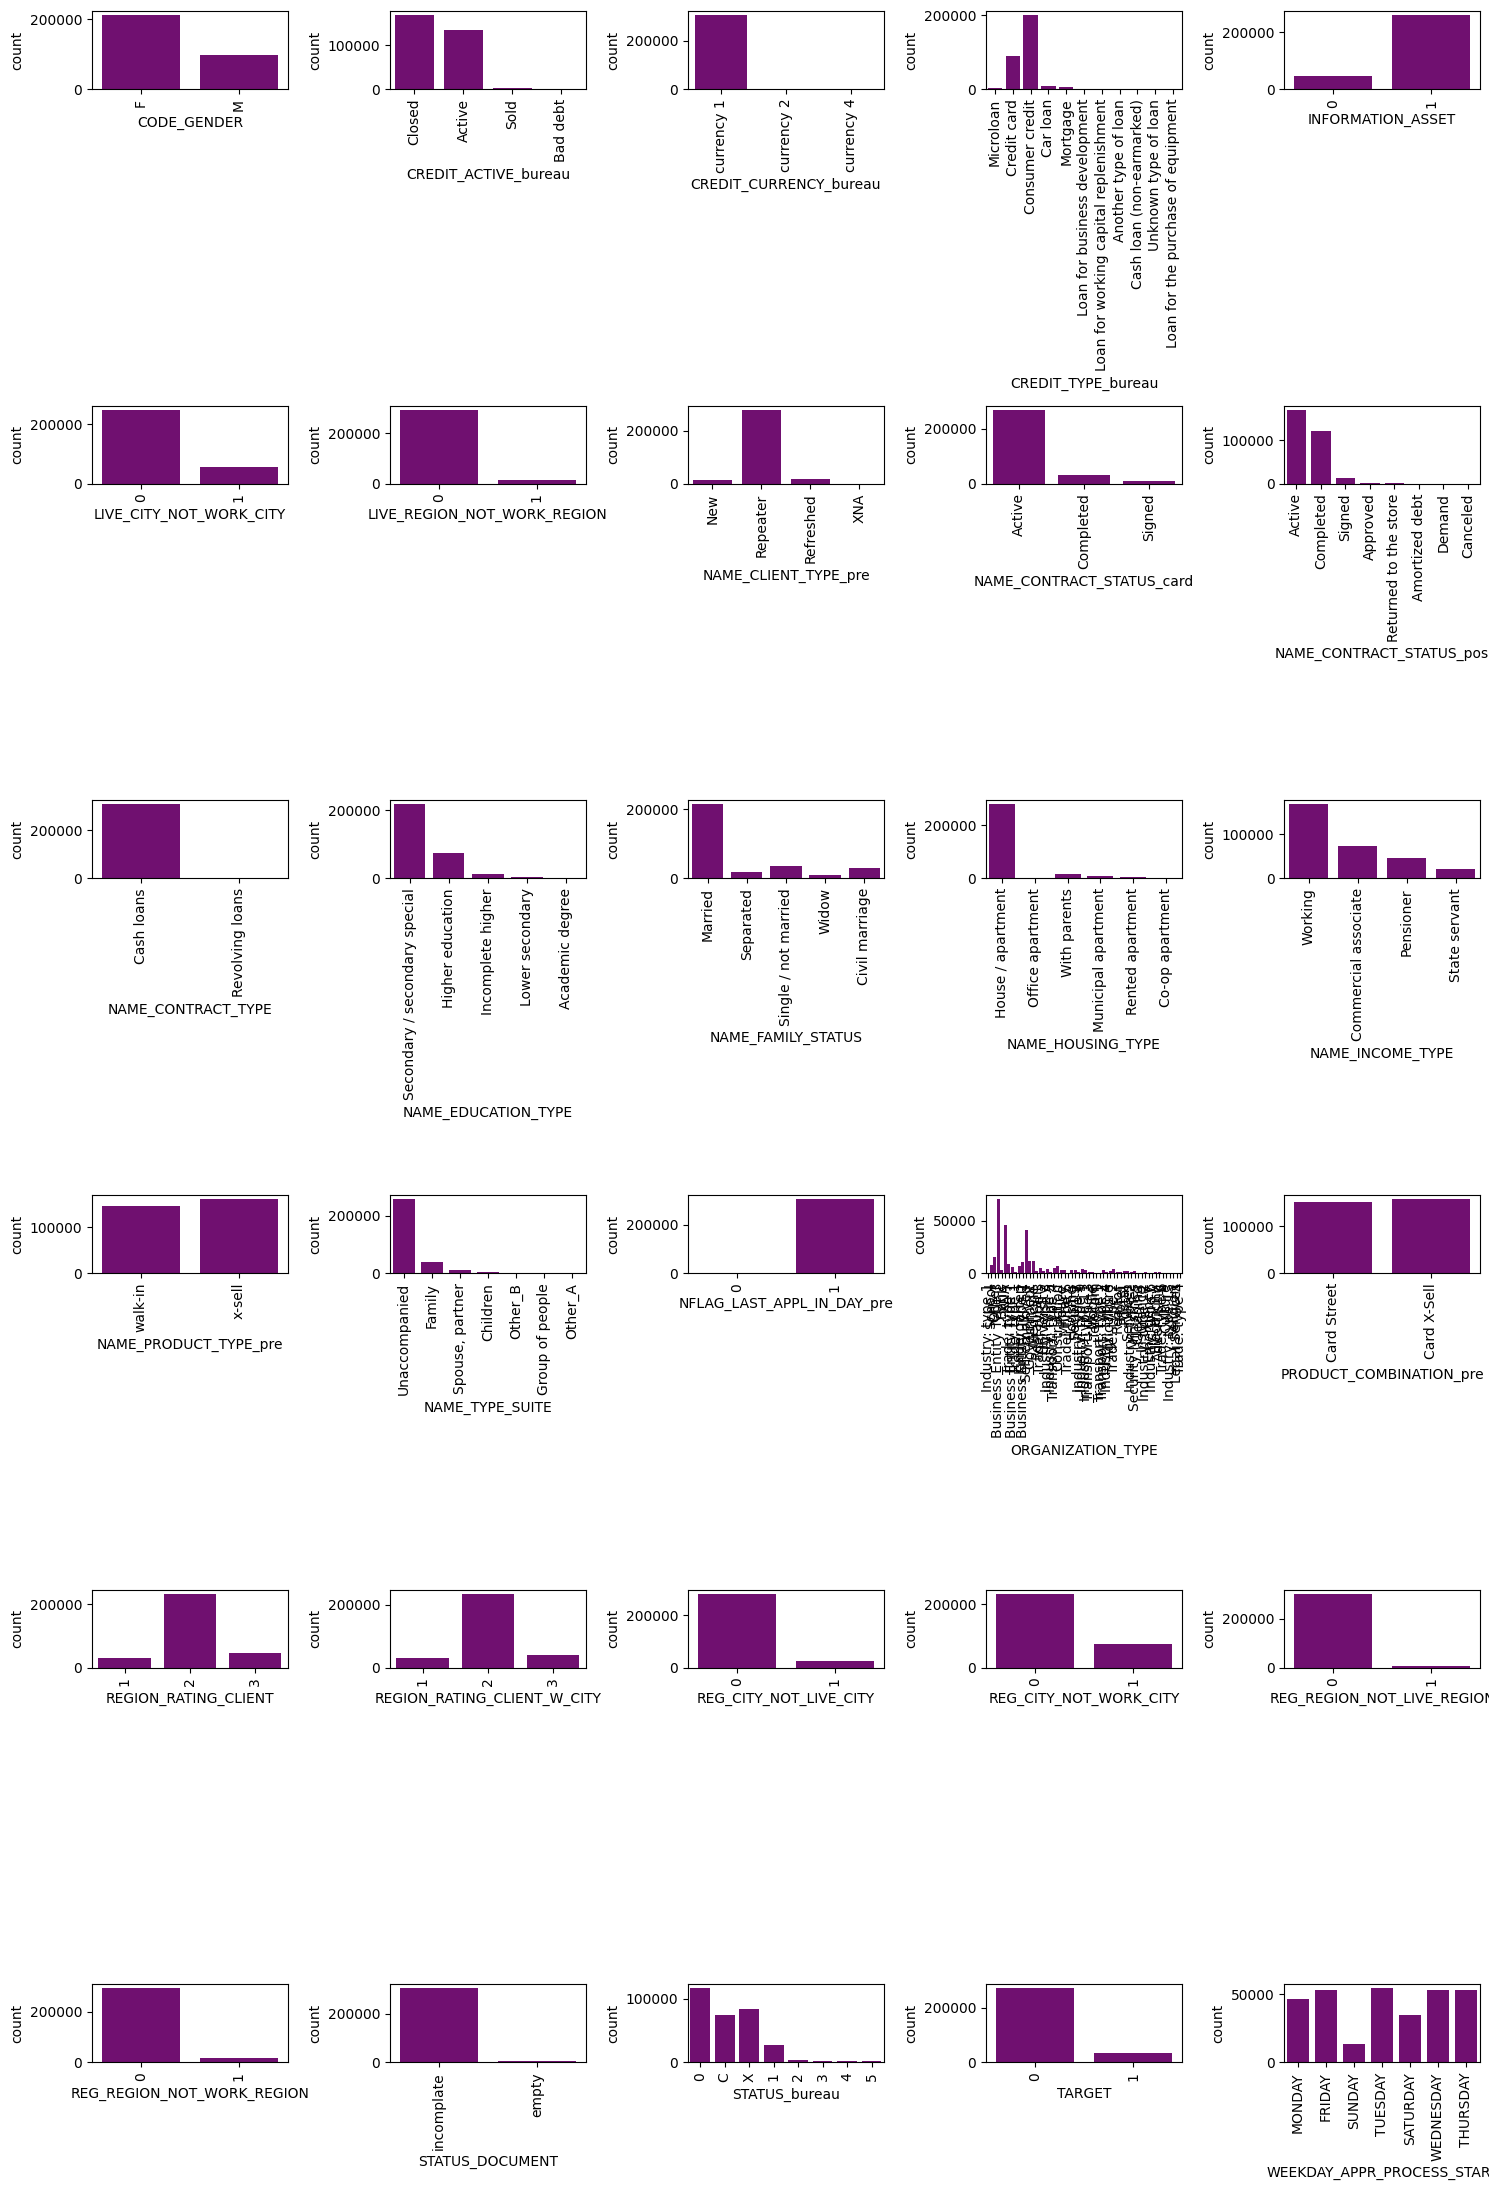

In [8]:
# @title Visualisasi Data Kategorikal
data_object = train.select_dtypes(include='object')
data_object = (data_object + train[['TARGET','REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','INFORMATION_ASSET','NFLAG_LAST_APPL_IN_DAY_pre']])
object1 = data_object.columns

plt.figure(figsize=(15, 22))
for i in range(0, len(object1)):
  plt.subplot(6, 5, i+1)
  sns.countplot(x=train[object1[i]],color='purple')
  plt.xticks(rotation=90)
  plt.tight_layout()

Jumlah feature numerik: 42


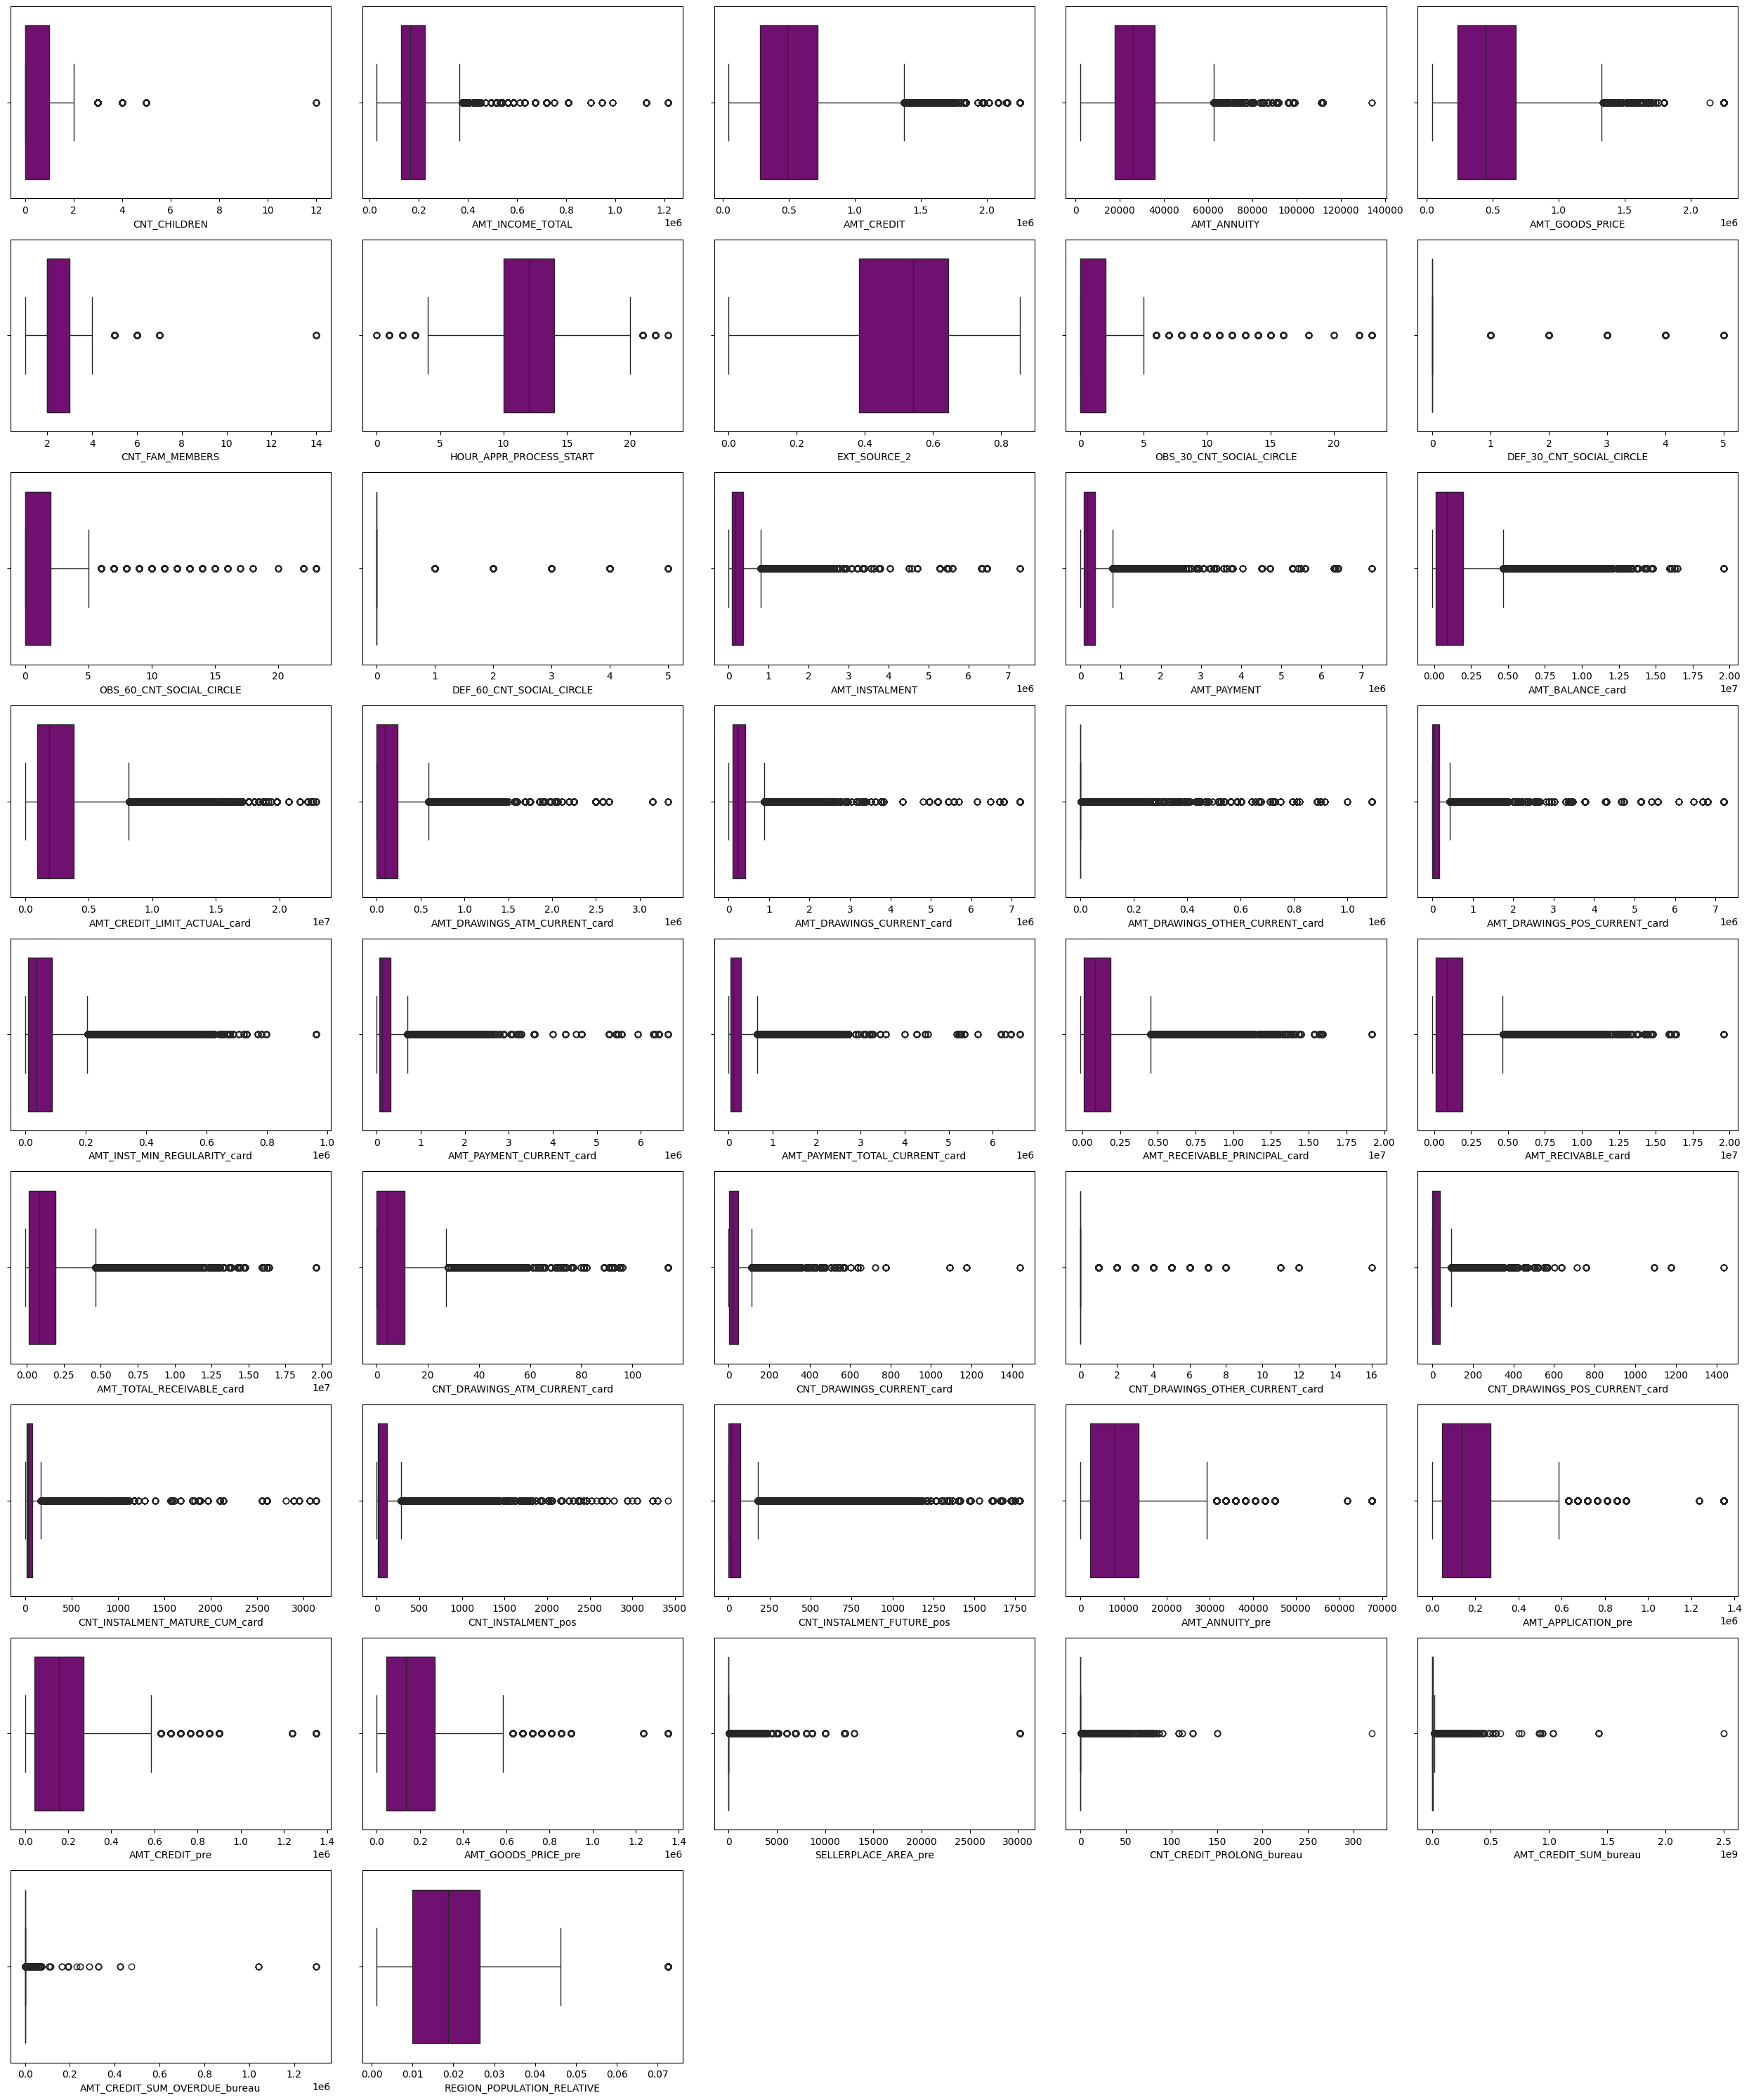

In [9]:
# memilah data yang bertype data numerikal namun arti feature sendiri merupakan numerikal
feature =['CNT_CHILDREN', 'AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE','CNT_FAM_MEMBERS','HOUR_APPR_PROCESS_START',  'EXT_SOURCE_2',
           'OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_INSTALMENT', 'AMT_PAYMENT',
           'AMT_BALANCE_card', 'AMT_CREDIT_LIMIT_ACTUAL_card','AMT_DRAWINGS_ATM_CURRENT_card', 'AMT_DRAWINGS_CURRENT_card','AMT_DRAWINGS_OTHER_CURRENT_card',
           'AMT_DRAWINGS_POS_CURRENT_card','AMT_INST_MIN_REGULARITY_card', 'AMT_PAYMENT_CURRENT_card','AMT_PAYMENT_TOTAL_CURRENT_card', 'AMT_RECEIVABLE_PRINCIPAL_card',
           'AMT_RECIVABLE_card', 'AMT_TOTAL_RECEIVABLE_card','CNT_DRAWINGS_ATM_CURRENT_card', 'CNT_DRAWINGS_CURRENT_card','CNT_DRAWINGS_OTHER_CURRENT_card',
           'CNT_DRAWINGS_POS_CURRENT_card','CNT_INSTALMENT_MATURE_CUM_card', 'CNT_INSTALMENT_pos','CNT_INSTALMENT_FUTURE_pos','AMT_ANNUITY_pre',
           'AMT_APPLICATION_pre', 'AMT_CREDIT_pre','AMT_GOODS_PRICE_pre','SELLERPLACE_AREA_pre',
           'CNT_CREDIT_PROLONG_bureau', 'AMT_CREDIT_SUM_bureau','AMT_CREDIT_SUM_OVERDUE_bureau','REGION_POPULATION_RELATIVE']
# menghitung jumlah feature yang dimiliki
print('Jumlah feature numerik:',len(feature))

plt.figure(figsize=(25, 30))
for i in range(0, len(feature)):
  plt.subplot(9, 5, i+1)
  sns.boxplot(x=train[feature[i]],color='purple')
  plt.tight_layout()

# Dari hasil visualisasi dibawah ini, menunjukan bahwa kolom feature numerik yang dimiliki memiliki outlier hampir seluruh feature numerik. Maka sebelum
# dilakukan permodelan saya akan melakukan langkah standarisasi terlebih dahulu untuk menyamaratakan skala agar model yang akan dilatih lebih robust.

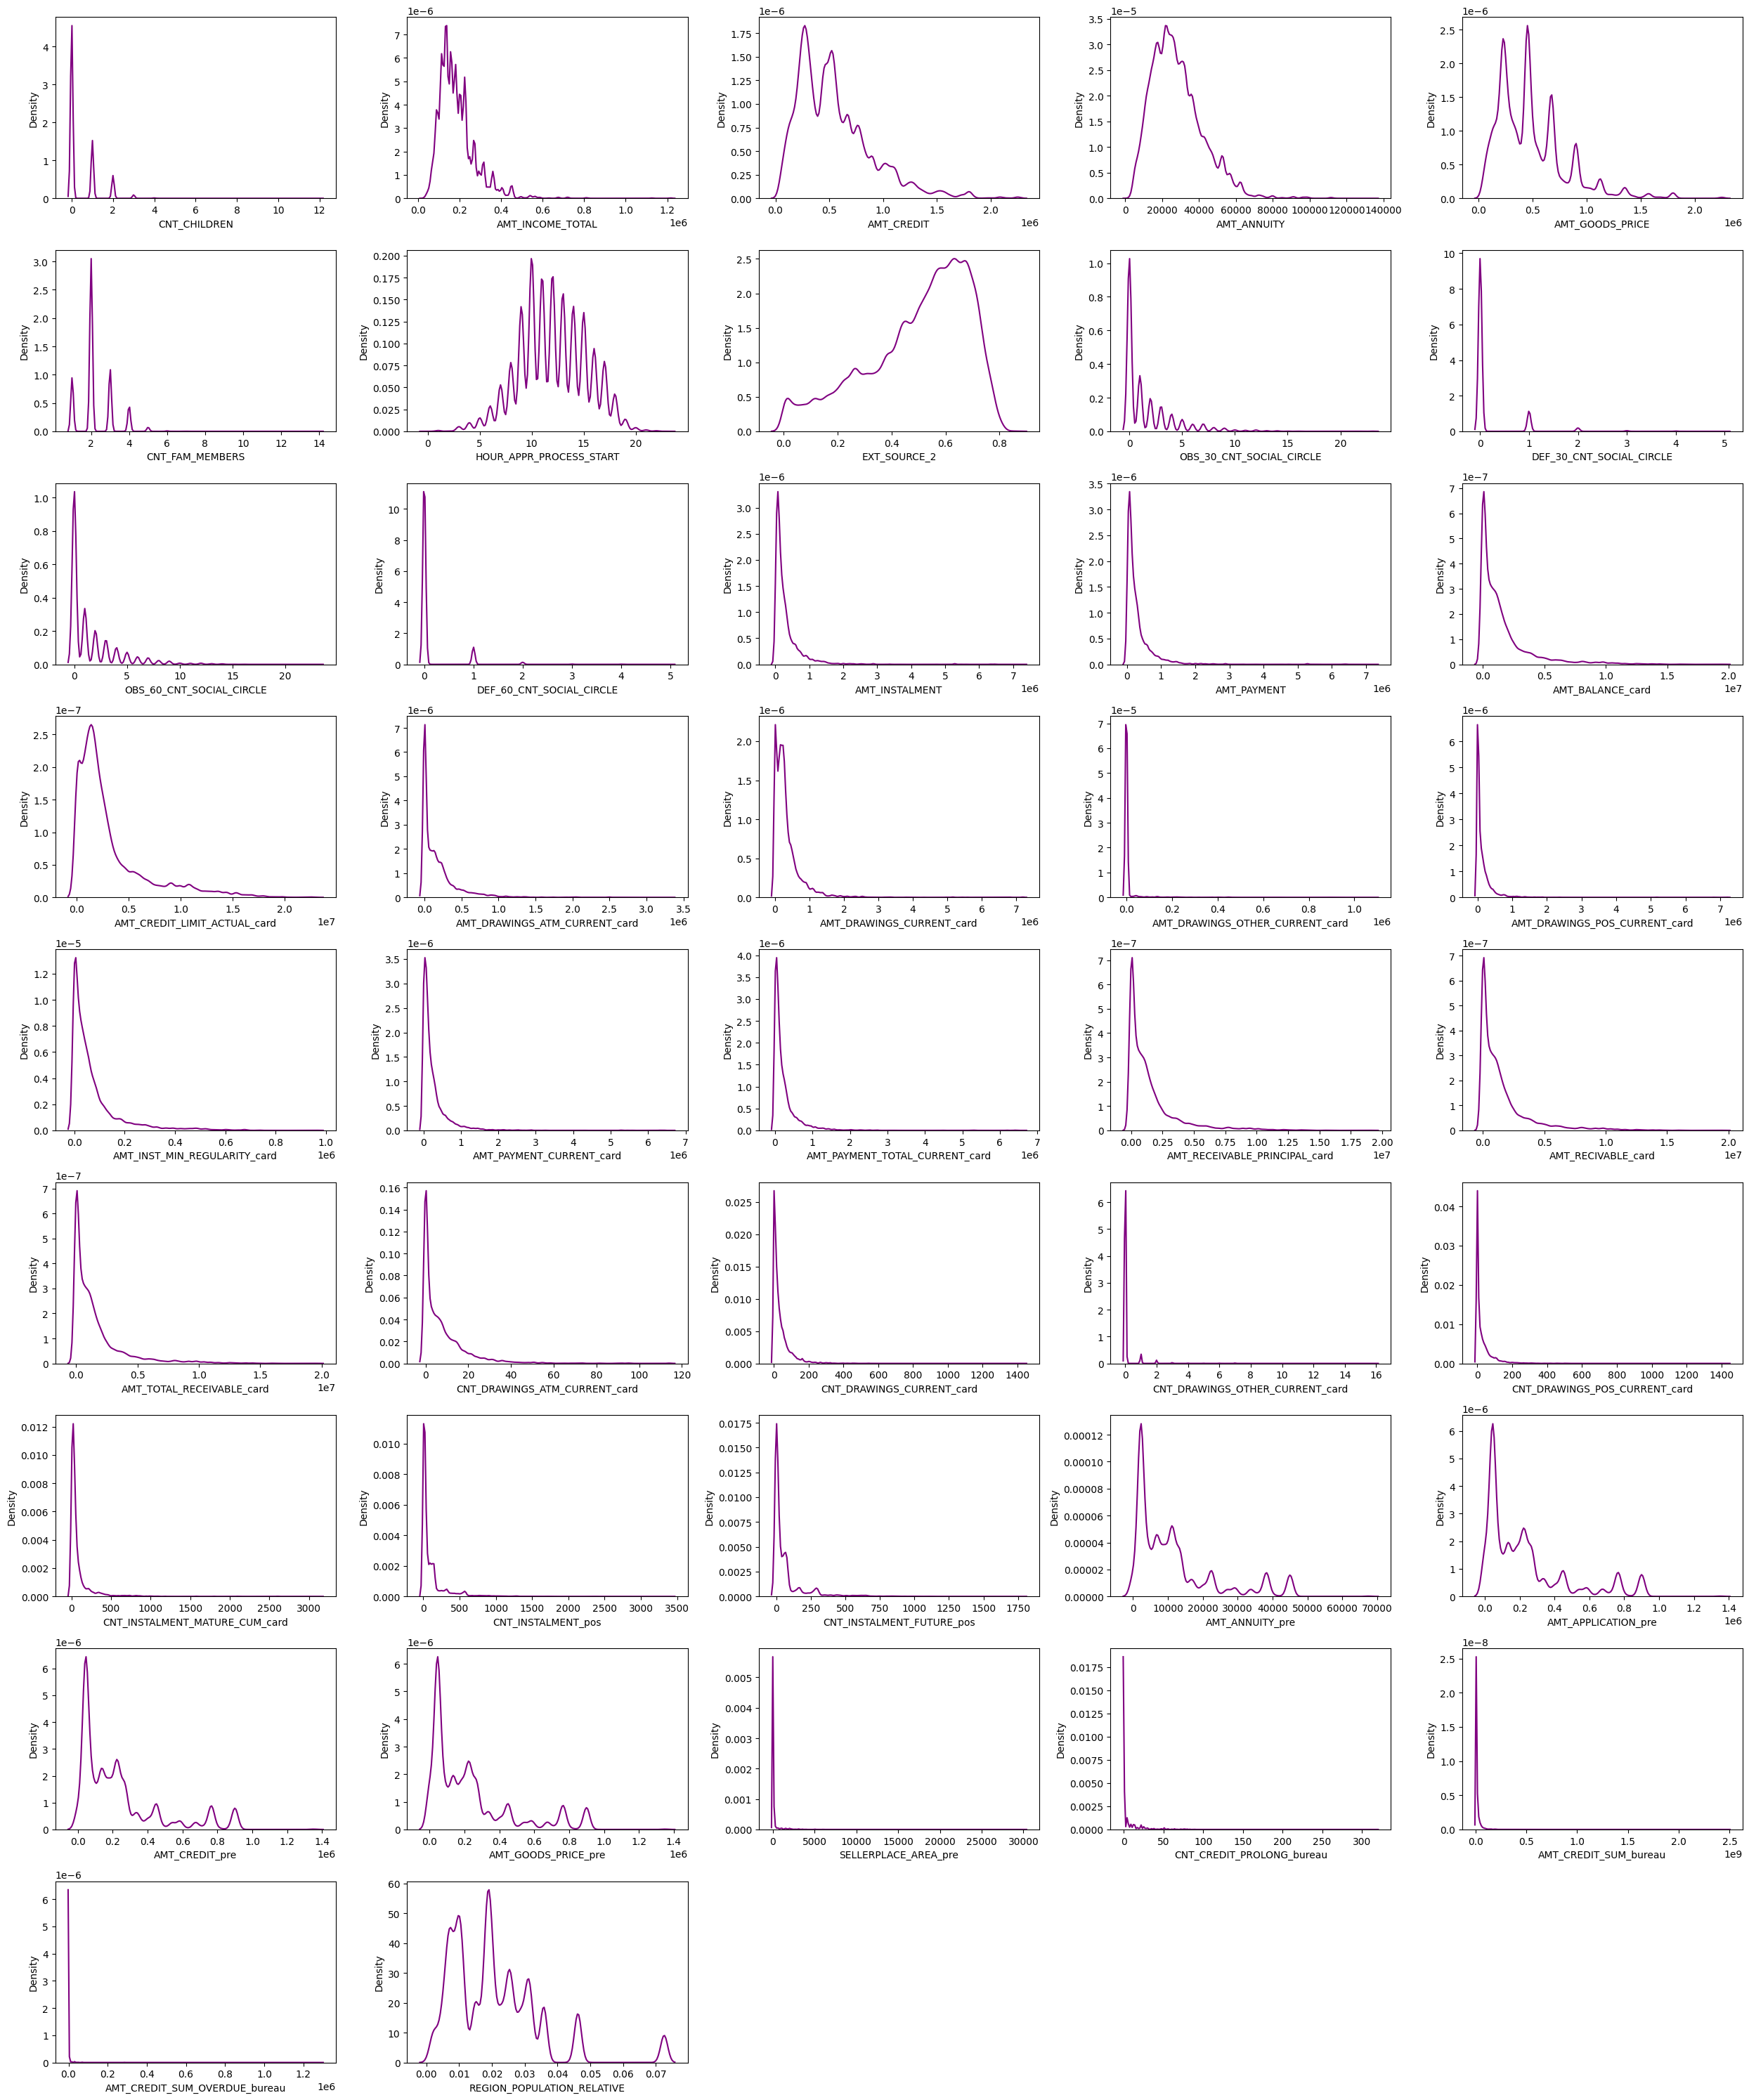

In [10]:
# @title Visualisasi Distribusi data pada Feature Numerik
plt.figure(figsize=(25, 30))
for i in range(0, len(feature)):
  plt.subplot(9, 5, i+1)
  sns.kdeplot(x=train[feature[i]],color='purple')
  plt.tight_layout()

# Dari hasil visualisasi menunjukan bahwa data numerik rata - rata memiliki distribusi yang sangat skewed, menurut saya dalam kontek bisnis keuangan
# sebuah outlier merupakan hak wajar seperti terdapat seorang client yang memiliki penghasilan tinggi dan hanya memiliki catatan kredit yang sedikit.
# Ini bisa jadi masuk akal dikarena nasabah terseut memiliki cukup uang dalam melakukan pembayaran tanpa perlu melakukan transaksi kredit. Namun tidak
# selalu semua outlier dalam data keuangan itu benar. Besar kemungkinan juga terjadi salahnya inputan , hal ini sangat perlu dilakukannya transformasi
# data untuk feature-feature yang memiliki kemungkinan terjadi kesalahan dalam proses inputan untuk mengurangi efek bias yang disebabkan oleh outlier tersebut


In [42]:
kol_count = [col for col in train.columns if col.startswith('CNT')]
print(kol_count)

# Berdasarkan feture yang memiliki judul awal CNT, menurut saya terdapat beberapa feature yang tidak terlalu dibutuhkan dalam proses permodelan selanjutnya
# oleh sebab itu maka saya akan memilih untuk menghapus kolom tersebut tanpa harus melakukan tranformasi data.

train.drop(columns=['CNT_CHILDREN','CNT_DRAWINGS_ATM_CURRENT_card','CNT_DRAWINGS_OTHER_CURRENT_card','CNT_DRAWINGS_CURRENT_card','CNT_DRAWINGS_POS_CURRENT_card',
                    'CNT_INSTALMENT_FUTURE_pos','CNT_CREDIT_PROLONG_bureau'],inplace=True)

test.drop(columns=['CNT_CHILDREN','CNT_DRAWINGS_ATM_CURRENT_card','CNT_DRAWINGS_OTHER_CURRENT_card','CNT_DRAWINGS_CURRENT_card','CNT_DRAWINGS_POS_CURRENT_card',
                    'CNT_INSTALMENT_FUTURE_pos','CNT_CREDIT_PROLONG_bureau'],inplace=True)

['CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'CNT_DRAWINGS_ATM_CURRENT_card', 'CNT_DRAWINGS_CURRENT_card', 'CNT_DRAWINGS_OTHER_CURRENT_card', 'CNT_DRAWINGS_POS_CURRENT_card', 'CNT_INSTALMENT_MATURE_CUM_card', 'CNT_INSTALMENT_pos', 'CNT_INSTALMENT_FUTURE_pos', 'CNT_CREDIT_PROLONG_bureau']


In [43]:
# melakukan analisa statistik pada feature tanggal
kol_tanggal = [col for col in train.columns if col.startswith('DAY')]
print(kol_tanggal)

Tanggal = train[['DAYS_BIRTH', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE','DAYS_INSTALMENT','DAYS_ENTRY_PAYMENT','MONTHS_BALANCE_bureau',
                 'DAYS_DECISION_pre','DAYS_CREDIT_bureau','DAYS_CREDIT_ENDDATE_bureau','DAYS_CREDIT_UPDATE_bureau','CREDIT_DAY_OVERDUE_bureau','DAYS_EMPLOYED']]

Tanggal.describe()

# Setelah dilakukan analisa didapat bahwa variabilitas (penyebaran data) berdasarkan nilai std memiliki rentang sangat jauh dengan nilai mean
# ini menunjukan data tersebar luas tidak hanya pada 1 titik saja. Dan dapat memicu kesulitanya dalam menginterpretasikan hasil, lalu terdapat feature
# yang memiliki nilai positif berbeda dengan value mayoritas dinama bernilai negatif. Anggapan saya bahwa terdapat kesalahan inputan pada data yang bernilai
# positif. Oleh karena itu saya akan mencoba mengubah nilai positif menjadi negatif dan melakukan seleksi feature yang kurang digunakan lalu
# melakukan analisa kembali.
# Assumsi saya value bernilai negatif pada feature dibawah ini menggambarkan hitungan mundur (harian).
# Namun untuk feature bureau saya akan memilih untuk menhapus karena value dari feature bureau menupakan asil kombinasi dari riwayat keuangan biro
# hitungan (bulan), ilustrasinya pada klien A memiliki daftar riwayat di biro keuangan dimana terhitung setiap bulannya, dalam setiap bulan
# memiliki gambaran hari kredit terakhir.

['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE', 'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT', 'DAYS_DECISION_pre', 'DAYS_CREDIT_bureau', 'DAYS_CREDIT_ENDDATE_bureau', 'DAYS_CREDIT_UPDATE_bureau']


,DAYS_BIRTH,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,MONTHS_BALANCE_bureau,DAYS_DECISION_pre,DAYS_CREDIT_bureau,DAYS_CREDIT_ENDDATE_bureau,DAYS_CREDIT_UPDATE_bureau,CREDIT_DAY_OVERDUE_bureau,DAYS_EMPLOYED
count,308299.000000,308299.000000,308299.000000,308299.000000,308299.000000,308299.000000,308299.000000,308299.000000,3.082990e+05,3.082990e+05,3.082990e+05,308299.000000,308299.000000
mean,-15522.461017,-4597.477501,-2993.858173,-1082.088988,-8348.485152,-8404.982329,-733.740106,-476.488630,-3.941389e+04,3.608162e+03,-2.162444e+04,23.265324,51948.738533
std,4061.675623,3409.698334,1497.656332,746.807702,16039.538848,16060.616699,1525.972927,343.074207,9.148233e+04,1.583994e+05,6.033299e+04,1566.490349,130498.156937
min,-24519.000000,-20838.000000,-6383.000000,-4066.000000,-194391.000000,-194660.000000,-26833.000000,-2785.000000,-1.905868e+06,-1.172026e+06,-1.266398e+06,0.000000,-15860.000000
25%,-18778.000000,-7063.000000,-4292.000000,-1685.000000,-8059.000000,-8103.000000,-694.000000,-553.000000,-3.372900e+04,-1.283200e+04,-1.450400e+04,0.000000,-2946.000000
50%,-15094.000000,-4106.000000,-3119.000000,-965.000000,-3590.000000,-3647.000000,-165.000000,-369.000000,-7.910000e+03,-4.880000e+02,-1.596000e+03,0.000000,-1452.000000
75%,-12105.000000,-1622.000000,-1786.000000,-458.000000,-1862.000000,-1893.000000,-38.000000,-281.000000,-1.934000e+03,4.992000e+03,-1.820000e+02,0.000000,-475.000000
max,-7771.000000,-1.000000,-1.000000,0.000000,-3.000000,0.000000,0.000000,-46.000000,-2.000000e+00,4.536658e+06,9.500000e+01,220590.000000,365243.000000


In [44]:
# Seleksi feature Days
train.drop(columns=['DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE', 'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT', 'DAYS_DECISION_pre',
                    'DAYS_CREDIT_bureau', 'DAYS_CREDIT_ENDDATE_bureau', 'DAYS_ID_PUBLISH','DAYS_CREDIT_UPDATE_bureau','MONTHS_BALANCE_bureau'], inplace=True)

Tanggal_t = train[['DAYS_BIRTH', 'DAYS_REGISTRATION', 'DAYS_EMPLOYED']]
Tanggal_t.max()

test.drop(columns=['DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE', 'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT', 'DAYS_DECISION_pre',
                    'DAYS_CREDIT_bureau', 'DAYS_CREDIT_ENDDATE_bureau', 'DAYS_ID_PUBLISH','DAYS_CREDIT_UPDATE_bureau','MONTHS_BALANCE_bureau'], inplace=True)


Tanggal_te = test[['DAYS_BIRTH', 'DAYS_REGISTRATION', 'DAYS_EMPLOYED']]
Tanggal_te.max()
print(len(Tanggal_te['DAYS_REGISTRATION']==0))
print(len(Tanggal_te['DAYS_EMPLOYED']==365243.0))

# Mengetahui jumlah data yang memiliki inputan yang salah
len(train[train['DAYS_EMPLOYED']==365243.0])

167287
167287


45573

In [45]:
# dikarenakan pada feature days_employed memiliki nilai positif maka saya akan melakukan perubahan value dari positif menjadi -1 dikarenakan terdapt
# value yang yang tinggi sehingga ketika akan dilakukan analisa dengan mengurangi waktu data (2018) dengan data days_employed akan mengalami error. Oleh
# karena itu saya memilih untuk mengubahnya ke -1 untuk mempermuddah analisa.
train['DAYS_EMPLOYED'] = train['DAYS_EMPLOYED'].replace(365243.0, -1)
test['DAYS_EMPLOYED'] = test['DAYS_EMPLOYED'].replace(365243.0, -1)

In [46]:
import time
cols = ['DAYS_BIRTH', 'DAYS_REGISTRATION', 'DAYS_EMPLOYED']
tahun_2018 = pd.to_datetime('2018-12-31')

for col in cols:
    train[col] = tahun_2018 + pd.to_timedelta(train[col], 'D')

# membuat feature baru penganti feature pada cols
train['AGE']= ((tahun_2018 - train['DAYS_BIRTH']).dt.days/365).round(0)
train['REGISTRATION_TIME']= ((tahun_2018 - train['DAYS_REGISTRATION']).dt.days/365).round(0)
train['WORK_DURATION']= ((tahun_2018 - train['DAYS_EMPLOYED']).dt.days/365).round(0)

# menghapus feature yang tidak diperlukan
train.drop(columns= cols, inplace=True)
print("Data setelah diubah:")
train.sample()

Data setelah diubah:


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,STATUS_DOCUMENT,INFORMATION_ASSET,SK_ID_PREV,AMT_INSTALMENT,AMT_PAYMENT,NAME_CONTRACT_STATUS_card,AMT_BALANCE_card,AMT_CREDIT_LIMIT_ACTUAL_card,AMT_DRAWINGS_ATM_CURRENT_card,AMT_DRAWINGS_CURRENT_card,AMT_DRAWINGS_OTHER_CURRENT_card,AMT_DRAWINGS_POS_CURRENT_card,AMT_INST_MIN_REGULARITY_card,AMT_PAYMENT_CURRENT_card,AMT_PAYMENT_TOTAL_CURRENT_card,AMT_RECEIVABLE_PRINCIPAL_card,AMT_RECIVABLE_card,AMT_TOTAL_RECEIVABLE_card,CNT_INSTALMENT_MATURE_CUM_card,NAME_CONTRACT_STATUS_pos,CNT_INSTALMENT_pos,SK_DPD_pos,SK_DPD_DEF_pos,AMT_ANNUITY_pre,AMT_APPLICATION_pre,AMT_CREDIT_pre,AMT_GOODS_PRICE_pre,NFLAG_LAST_APPL_IN_DAY_pre,NAME_CLIENT_TYPE_pre,NAME_PRODUCT_TYPE_pre,SELLERPLACE_AREA_pre,PRODUCT_COMBINATION_pre,CREDIT_ACTIVE_bureau,CREDIT_TYPE_bureau,STATUS_bureau,CREDIT_CURRENCY_bureau,SK_ID_BUREAU_bureau,CREDIT_DAY_OVERDUE_bureau,AMT_CREDIT_SUM_bureau,AMT_CREDIT_SUM_OVERDUE_bureau,AGE,REGISTRATION_TIME,WORK_DURATION
323676,441981,0,Cash loans,F,382500.0,635962.5,27072.0,549000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.00702,2.0,2,2,TUESDAY,10,0,0,0,0,0,0,Self-employed,0.604147,1.0,0.0,1.0,0.0,incomplate,1,1277044,664184.52,664184.52,Completed,0.0,450000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,Active,12.0,0,0,4500.0,900000.0,90000.0,900000.0,1,Repeater,x-sell,-1,Card X-Sell,Active,Consumer credit,0,currency 1,62774627,0,13776300.0,0.0,43.0,0.0,5.0


In [47]:
import time
cols = ['DAYS_BIRTH', 'DAYS_REGISTRATION', 'DAYS_EMPLOYED']
tahun_2018 = pd.to_datetime('2018-12-31')

for col in cols:
    test[col] = tahun_2018 + pd.to_timedelta(test[col], 'D')

# membuat feature baru penganti feature pada cols
test['AGE']= ((tahun_2018 - test['DAYS_BIRTH']).dt.days/365).round(0)
test['REGISTRATION_TIME']= ((tahun_2018 - test['DAYS_REGISTRATION']).dt.days/365).round(0)
test['WORK_DURATION']= ((tahun_2018 - test['DAYS_EMPLOYED']).dt.days/365).round(0)

# menghapus feature yang tidak diperlukan
test.drop(columns= cols, inplace=True)
print("Data setelah diubah:")
test.sample()

Data setelah diubah:


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,STATUS_DOCUMENT,INFORMATION_ASSET,SK_ID_PREV,AMT_INSTALMENT,AMT_PAYMENT,NAME_CONTRACT_STATUS_card,AMT_BALANCE_card,AMT_CREDIT_LIMIT_ACTUAL_card,AMT_DRAWINGS_ATM_CURRENT_card,AMT_DRAWINGS_CURRENT_card,AMT_DRAWINGS_OTHER_CURRENT_card,AMT_DRAWINGS_POS_CURRENT_card,AMT_INST_MIN_REGULARITY_card,AMT_PAYMENT_CURRENT_card,AMT_PAYMENT_TOTAL_CURRENT_card,AMT_RECEIVABLE_PRINCIPAL_card,AMT_RECIVABLE_card,AMT_TOTAL_RECEIVABLE_card,CNT_INSTALMENT_MATURE_CUM_card,NAME_CONTRACT_STATUS_pos,CNT_INSTALMENT_pos,SK_DPD_pos,SK_DPD_DEF_pos,AMT_ANNUITY_pre,AMT_APPLICATION_pre,AMT_CREDIT_pre,AMT_GOODS_PRICE_pre,NFLAG_LAST_APPL_IN_DAY_pre,NAME_CLIENT_TYPE_pre,NAME_PRODUCT_TYPE_pre,SELLERPLACE_AREA_pre,PRODUCT_COMBINATION_pre,CREDIT_ACTIVE_bureau,CREDIT_TYPE_bureau,STATUS_bureau,CREDIT_CURRENCY_bureau,SK_ID_BUREAU_bureau,CREDIT_DAY_OVERDUE_bureau,AMT_CREDIT_SUM_bureau,AMT_CREDIT_SUM_OVERDUE_bureau,AGE,REGISTRATION_TIME,WORK_DURATION
53499,205264,Cash loans,F,247500.0,710892.0,69385.5,679500.0,Unaccompanied,Commercial associate,Incomplete higher,Civil marriage,House / apartment,0.007274,3.0,2,2,WEDNESDAY,18,0,0,0,0,0,0,Other,0.469997,0.0,0.0,0.0,0.0,incomplate,1,2451090,776507.805,766124.955,Active,2232877.05,13990500,207000.0,840893.445,0.0,633893.445,98471.745,766124.955,766124.955,2171569.095,2219422.05,2219422.05,171.0,Completed,18.0,0,0,38250.0,765000.0,765000.0,765000.0,1,Repeater,x-sell,-1,Card X-Sell,Closed,Consumer credit,X,currency 1,6009611,0,36328.5,0.0,32.0,15.0,11.0


In [16]:
# Cross Cek Type Data
train[['AGE','REGISTRATION_TIME','WORK_DURATION']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 308299 entries, 0 to 336845
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   AGE                308299 non-null  float64
 1   REGISTRATION_TIME  308299 non-null  float64
 2   WORK_DURATION      308299 non-null  float64
dtypes: float64(3)
memory usage: 9.4 MB


In [51]:
# Cross cek feature age, registration dam work duration apakah terdapat nilai desimal dibelakang koma bukan bernilai 0

def check_values(df, columns):
  result={}
  for col in columns:
    result[col] = df[(df[col]>1) % 1 !=0][col].tolist()
  return result

columns_to_check = ['AGE', 'REGISTRATION_TIME', 'WORK_DURATION']

# Get the result
result = check_values(train, columns_to_check)
result1 = check_values(test, columns_to_check)

# Print the result
print('AGE:', result['AGE'])
print('REGISTRATION TIME:', result['REGISTRATION_TIME'])
print('WORK_DURATION:', result['WORK_DURATION'])
print('++++++'*5)
print('AGE:', result['AGE'])
print('REGISTRATION TIME:', result['REGISTRATION_TIME'])
print('WORK_DURATION:', result['WORK_DURATION'])

AGE: []
REGISTRATION TIME: []
WORK_DURATION: []
++++++++++++++++++++++++++++++
AGE: []
REGISTRATION TIME: []
WORK_DURATION: []


In [52]:
# Mengubah type data
train['AGE']=  train['AGE'].astype(int)
train['REGISTRATION_TIME']= train['REGISTRATION_TIME'].astype(int)
train['WORK_DURATION']= train['WORK_DURATION'].astype(int)

test['AGE']=  test['AGE'].astype(int)
test['REGISTRATION_TIME']= test['REGISTRATION_TIME'].astype(int)
test['WORK_DURATION']= test['WORK_DURATION'].astype(int)


# Cross Cek Type Data
train[['AGE','REGISTRATION_TIME','WORK_DURATION']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 308299 entries, 0 to 336845
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   AGE                308299 non-null  int64
 1   REGISTRATION_TIME  308299 non-null  int64
 2   WORK_DURATION      308299 non-null  int64
dtypes: int64(3)
memory usage: 9.4 MB


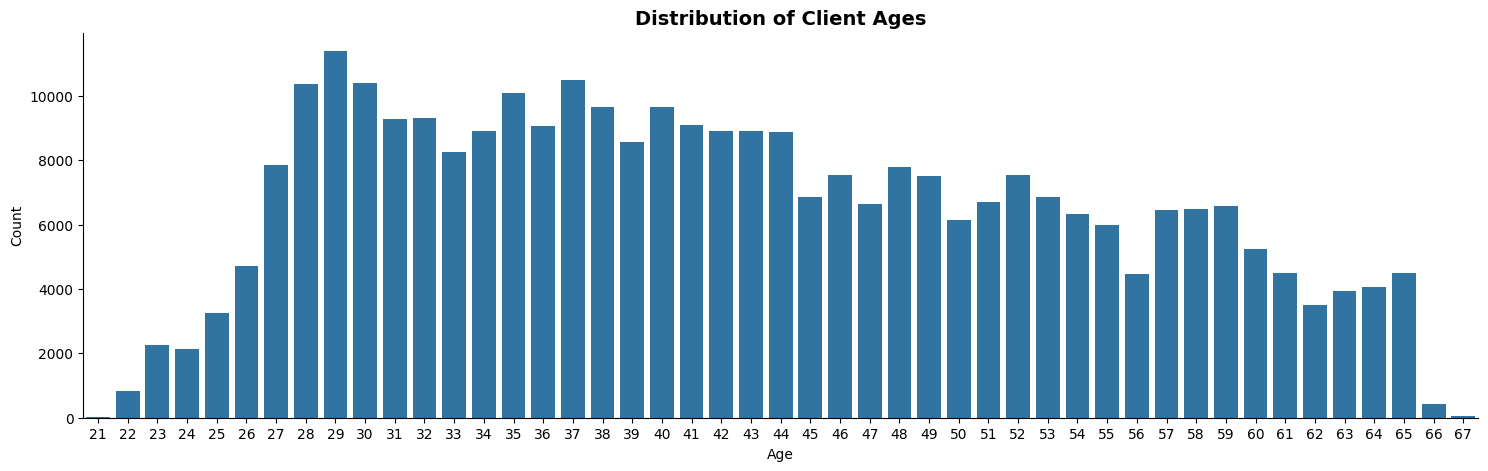

In [19]:
# @title Visualisasi Usia Klien
plt.figure(figsize=(18,5))
age=train['AGE'].value_counts().reset_index().sort_values(by='AGE', ascending=False)
age.columns = ['AGE', 'count']
sns.barplot(x='AGE',y='count',data=age,orient='v')
plt.title("Distribution of Client Ages",fontweight='bold', fontsize=14)
plt.xlabel("Age")
plt.ylabel("Count")
plt.gca().spines[['top','right']].set_visible(False)
plt.show()

# Berdasarkan visualisasi menunjukan bahwa rata- rata clien yang dimiliki dari rentang usia 27 keatas, dan clien yang terdapat pada dataset ini
# mayoritas di usia 29 tahun

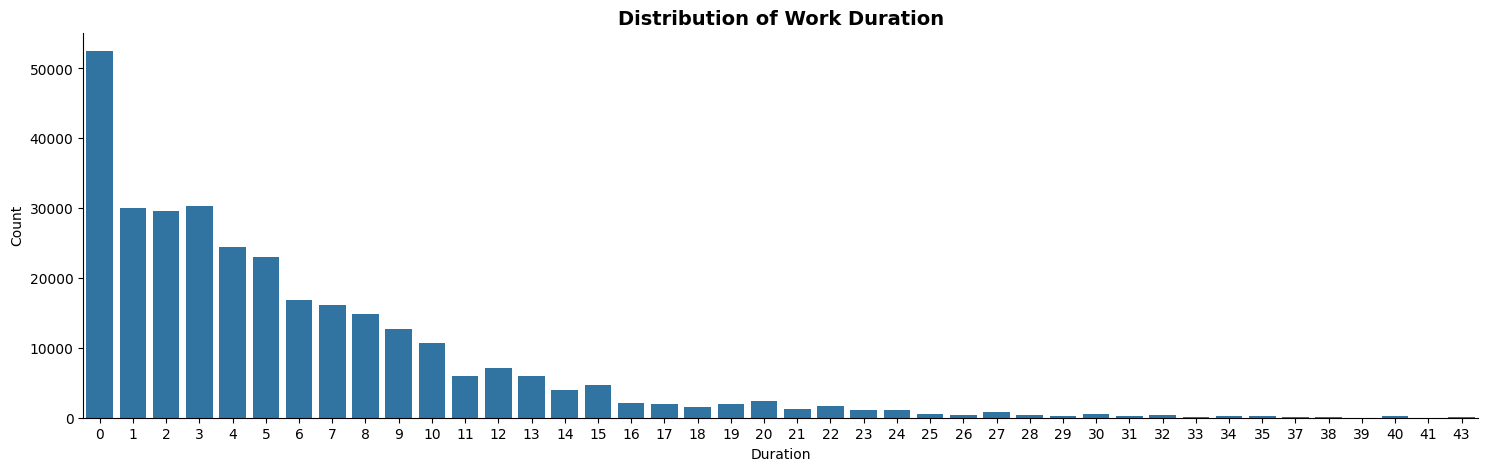

In [20]:
# @title Visualisasi Durasi Kerja
plt.figure(figsize=(18,5))
age=train['WORK_DURATION'].value_counts().reset_index().sort_values(by='WORK_DURATION', ascending=False)
age.columns = ['WORK_DURATION', 'count']
sns.barplot(x='WORK_DURATION',y='count',data=age,orient='v')
plt.title("Distribution of Work Duration",fontweight='bold', fontsize=14)
plt.xlabel("Duration")
plt.ylabel("Count")
plt.gca().spines[['top','right']].set_visible(False)
plt.show()

# Clien yang dimiliki pada dataset ini mayoritas memiliki durasi kerja di bawah 1 tahun (asumsi sementara, saya tidak mengasumsikan bahwa nilai 0 diartikan
# tidak bekerja melaikan memiliki durasi kerja dibawah 1 tahun)

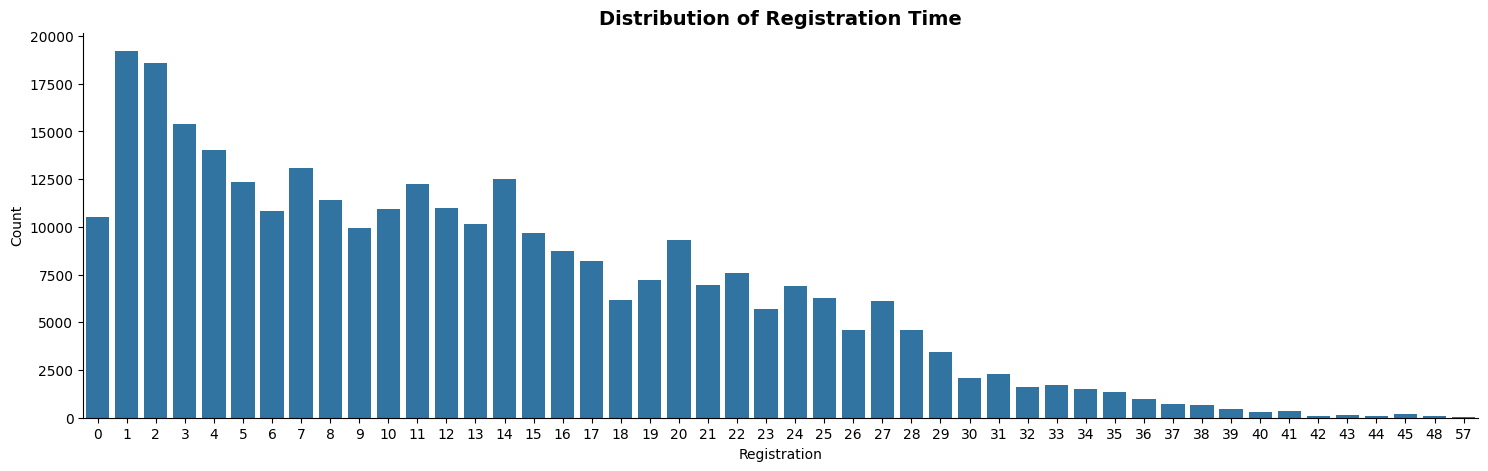

In [21]:
# @title Visualisasi Registrasi
plt.figure(figsize=(18,5))
age=train['REGISTRATION_TIME'].value_counts().reset_index().sort_values(by='REGISTRATION_TIME', ascending=False)
age.columns = ['REGISTRATION_TIME', 'count']
sns.barplot(x='REGISTRATION_TIME',y='count',data=age,orient='v')
plt.title("Distribution of Registration Time",fontweight='bold', fontsize=14)
plt.xlabel("Registration")
plt.ylabel("Count")
plt.gca().spines[['top','right']].set_visible(False)
plt.show()

# Berdasarkan visualisasi menunjukan bahwa clien yang dimiliki mayoritas nasabah baru.

In [53]:
# @title Analisa Feature Encoder
print('Jumlah feature',train.shape[1])
print('Jumlah feature kategorikal',(train.select_dtypes(include='object').head()).shape[1])
print(train.select_dtypes(include='object').head(2))

# Data kategori yang dimiliki rata-rata tidak memiliki tingkatan dengan kata lain metode yg lebih cocok adalah one hot encoder, namun dalam kasus ini
# feature yg dimiliki dalam dataset ini cukup besar. Jika dilakukan one hot encoder akan meningkatkan kompleksitas dari permodelan, dengan begitu saya
# akan memilih untuk melakukan seleksi feature yang tidak terlalu berguna sebelum dilakukan label encoder. Seperti contoh feature yang kemungkinan akan
# saya hapus antara lain NAME_TYPE_SUITE, WEEKDAY_APPR_PROCESS_START, NAME_CONTRACT_STATUS_pos, NAME_CLIENT_TYPE_pre, CREDIT_ACTIVE_bureau, CREDIT_TYPE_bureau,
# STATUS_bureau, CREDIT_CURRENCY_bureau

train.drop(columns=['NAME_TYPE_SUITE','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE','NAME_CONTRACT_STATUS_pos','NAME_CLIENT_TYPE_pre', 'CREDIT_ACTIVE_bureau', 'CREDIT_TYPE_bureau',	'STATUS_bureau', 'CREDIT_CURRENCY_bureau'],inplace=True)
test.drop(columns=['NAME_TYPE_SUITE','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE','NAME_CONTRACT_STATUS_pos','NAME_CLIENT_TYPE_pre', 'CREDIT_ACTIVE_bureau', 'CREDIT_TYPE_bureau',	'STATUS_bureau', 'CREDIT_CURRENCY_bureau'],inplace=True)
train.select_dtypes(include='object').sample()

Jumlah feature 74
Jumlah feature kategorikal 19
  NAME_CONTRACT_TYPE CODE_GENDER NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         Cash loans           F   Unaccompanied          Working   
1         Cash loans           F   Unaccompanied          Working   

             NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special            Married  House / apartment   
1  Secondary / secondary special            Married  House / apartment   

  WEEKDAY_APPR_PROCESS_START ORGANIZATION_TYPE STATUS_DOCUMENT  \
0                     MONDAY  Industry: type 1      incomplate   
1                     MONDAY  Industry: type 1      incomplate   

  NAME_CONTRACT_STATUS_card NAME_CONTRACT_STATUS_pos NAME_CLIENT_TYPE_pre  \
0                    Active                   Active                  New   
1                    Active                   Active                  New   

  NAME_PRODUCT_TYPE_pre PRODUCT_COMBINATION_pre CREDIT_ACTIVE_bureau  \
0               wa

,NAME_CONTRACT_TYPE,CODE_GENDER,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,STATUS_DOCUMENT,NAME_CONTRACT_STATUS_card,NAME_PRODUCT_TYPE_pre,PRODUCT_COMBINATION_pre
67228,Cash loans,M,Commercial associate,Higher education,Married,House / apartment,incomplate,Active,walk-in,Card Street


In [54]:
# @title Melakukan Mapping TRAIN
train['CONTRACT_TYPE'] = train['NAME_CONTRACT_TYPE'].replace({'Cash loans': 0, 'Revolving loans': 1})
train['PRODUCT_TYPE'] = train['NAME_PRODUCT_TYPE_pre'].replace({'walk-in': 0, 'x-sell': 1})
train['PRODUCT_COMBINATION'] = train['PRODUCT_COMBINATION_pre'].replace({'Card Street': 0, 'Card X-Sell': 1})
train['EDUCATION'] = train['NAME_EDUCATION_TYPE'].replace({'Lower secondary': 0, 'Secondary / secondary special': 1, 'Incomplete higher': 2, 'Higher education': 3, 'Academic degree':4})
train['DOCUMENT'] = train['STATUS_DOCUMENT'].replace({'incomplate': 0, 'empty': 1})
train['CONTRACT_STATUS'] = train['NAME_CONTRACT_STATUS_card'].replace({'Completed': 0, 'Active': 1, 'Signed': 2})
train['HOUSING_TYPE'] = train['NAME_HOUSING_TYPE'].replace({'House / apartment': 0, 'With parents': 1, 'Municipal apartment': 2, 'Rented apartment':3, 'Office apartment':4, 'Co-op apartment':5})
train['INCOME_TYPE'] = train['NAME_INCOME_TYPE'].replace({'Commercial associate': 0, 'Pensioner': 1, 'State servant': 2, 'Working':3})

# Memperbaiki value yang salah dan melakukan Mapping
train['MARITAL_sTATUS'] = train['NAME_FAMILY_STATUS'].replace({'Married':'Married','Civil marriage':'Married','Single / not married':'Single','Separated':'Separated','Widow':'Separated'})
train['MARITAL_STATUS'] = train['MARITAL_sTATUS'].replace({'Married':1,'Single':0,'Separated':2})
train['gANDER'] = train['CODE_GENDER'].replace({'M':'M','F':'F','XNA':'F'})
train['GANDER'] = train['gANDER'].replace({'M':1,'F':0})

# menghapus feature sebelumnya
train.drop(columns=['NAME_CONTRACT_TYPE','CODE_GENDER','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','MARITAL_sTATUS',
                    'STATUS_DOCUMENT','NAME_CONTRACT_STATUS_card','NAME_PRODUCT_TYPE_pre','PRODUCT_COMBINATION_pre','gANDER'],inplace=True)

train.drop(columns=['SK_ID_CURR', 'SK_ID_PREV', 'SK_DPD_pos', 'SK_DPD_DEF_pos', 'SK_ID_BUREAU_bureau'],inplace=True)


In [55]:
# @title Melakukan Mapping Test
test['CONTRACT_TYPE'] = test['NAME_CONTRACT_TYPE'].replace({'Cash loans': 0, 'Revolving loans': 1})
test['PRODUCT_TYPE'] = test['NAME_PRODUCT_TYPE_pre'].replace({'walk-in': 0, 'x-sell': 1})
test['PRODUCT_COMBINATION'] = test['PRODUCT_COMBINATION_pre'].replace({'Card Street': 0, 'Card X-Sell': 1})
test['EDUCATION'] = test['NAME_EDUCATION_TYPE'].replace({'Lower secondary': 0, 'Secondary / secondary special': 1, 'Incomplete higher': 2, 'Higher education': 3, 'Academic degree':4})
test['DOCUMENT'] = test['STATUS_DOCUMENT'].replace({'incomplate': 0, 'empty': 1})
test['CONTRACT_STATUS'] = test['NAME_CONTRACT_STATUS_card'].replace({'Completed': 0, 'Active': 1, 'Signed': 2})
test['HOUSING_TYPE'] = test['NAME_HOUSING_TYPE'].replace({'House / apartment': 0, 'With parents': 1, 'Municipal apartment': 2, 'Rented apartment':3, 'Office apartment':4, 'Co-op apartment':5})
test['INCOME_TYPE'] = test['NAME_INCOME_TYPE'].replace({'Commercial associate': 0, 'Pensioner': 1, 'State servant': 2, 'Working':3})

# Memperbaiki value yang salah dan melakukan Mapping
test['MARITAL_sTATUS'] = test['NAME_FAMILY_STATUS'].replace({'Married':'Married','Civil marriage':'Married','Single / not married':'Single','Separated':'Separated','Widow':'Separated'})
test['MARITAL_STATUS'] = test['MARITAL_sTATUS'].replace({'Married':1,'Single':0,'Separated':2})
test['gANDER'] = test['CODE_GENDER'].replace({'M':'M','F':'F','XNA':'F'})
test['GENDER'] = test['gANDER'].replace({'M':1,'F':0})

# menghapus feature sebelumnya
test.drop(columns=['NAME_CONTRACT_TYPE','CODE_GENDER','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','MARITAL_sTATUS',
                    'STATUS_DOCUMENT','NAME_CONTRACT_STATUS_card','NAME_PRODUCT_TYPE_pre','PRODUCT_COMBINATION_pre','gANDER'],inplace=True)

test.drop(columns=['SK_ID_CURR', 'SK_ID_PREV', 'SK_DPD_pos', 'SK_DPD_DEF_pos', 'SK_ID_BUREAU_bureau'],inplace=True)


In [56]:
# @title Handle Class Imbalance by SMOTE
from imblearn.over_sampling import SMOTE
Train_indep = train.drop('TARGET', axis=1)
Train_depen = train['TARGET']

smote= SMOTE(random_state=42)
indep_resample, depen_resample = smote.fit_resample(Train_indep, Train_depen)

Train_balance =pd.concat([indep_resample, depen_resample],axis=1)
print('TARGET:\n',Train_balance.TARGET.value_counts())
print('TOTAL DATA:\n',Train_balance.shape)
Train_balance.sample()

TARGET:
 TARGET
0    272207
1    272207
Name: count, dtype: int64
TOTAL DATA:
 (544414, 60)


,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,INFORMATION_ASSET,AMT_INSTALMENT,AMT_PAYMENT,AMT_BALANCE_card,AMT_CREDIT_LIMIT_ACTUAL_card,AMT_DRAWINGS_ATM_CURRENT_card,AMT_DRAWINGS_CURRENT_card,AMT_DRAWINGS_OTHER_CURRENT_card,AMT_DRAWINGS_POS_CURRENT_card,AMT_INST_MIN_REGULARITY_card,AMT_PAYMENT_CURRENT_card,AMT_PAYMENT_TOTAL_CURRENT_card,AMT_RECEIVABLE_PRINCIPAL_card,AMT_RECIVABLE_card,AMT_TOTAL_RECEIVABLE_card,CNT_INSTALMENT_MATURE_CUM_card,CNT_INSTALMENT_pos,AMT_ANNUITY_pre,AMT_APPLICATION_pre,AMT_CREDIT_pre,AMT_GOODS_PRICE_pre,NFLAG_LAST_APPL_IN_DAY_pre,SELLERPLACE_AREA_pre,CREDIT_DAY_OVERDUE_bureau,AMT_CREDIT_SUM_bureau,AMT_CREDIT_SUM_OVERDUE_bureau,AGE,REGISTRATION_TIME,WORK_DURATION,CONTRACT_TYPE,PRODUCT_TYPE,PRODUCT_COMBINATION,EDUCATION,DOCUMENT,CONTRACT_STATUS,HOUSING_TYPE,INCOME_TYPE,MARITAL_STATUS,GANDER,TARGET
539542,225000.0,270000.0,13914.0,270000.0,0.019689,2.0,2,2,9,0,0,0,0,0,0,0.525052,0.0,0.0,0.0,0.0,1,70120.755,70120.755,871337.97,1485000,105300.0,212096.79,0.0,106796.79,30697.515,60220.755,52925.175,807056.82,845779.275,845779.275,28.0,4.193988,2250.0,45000.0,45000.0,45000.0,1,195,0,468000.0,0.0,41,4,1,0,0,0,1,0,1,0,3,1,0,1


## Feature Selection

In [26]:
# @title Seleksi Feature metode RFE (RECUSIVE FEATURE ELIMINATION) 'Random Forest Classifier'
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict, GridSearchCV,KFold,cross_val_score
from sklearn.metrics import confusion_matrix, classification_report

X = Train_balance.drop(columns='TARGET') # saya menggunakan data train yang sudah dilakukan balancing namun belum dilakukan standarisasi
y = Train_balance['TARGET']

random = RandomForestClassifier()
rfe = RFE(random, n_features_to_select = 18)
rfe.fit(X, y)
select_features = X.columns[rfe.support_]

print(rfe.support_)
print('-------------------------------------------')
print('Select Feature:\n', select_features)

# '''https://medium.com/@ogre51/how-would-you-go-about-choosing-the-right-parameters-for-logistic-regression-9284fc4b560'''

# mencari nilai cv optimal dalam model logistik regresion
cv_values = [ 7, 10, 15]

# Dictionary untuk menyimpan hasil skor
results = {}

# Evaluasi model untuk setiap nilai cv
for cv in cv_values:
    scores = cross_val_score(random, X, y, cv=cv, scoring='accuracy')
    results[cv] = np.mean(scores)
    print(f"Mean accuracy for cv={cv}: {np.mean(scores)}")

# Menemukan nilai cv dengan skor terbaik
optimal_cv = max(results, key=results.get)
print(f"Optimal cv: {optimal_cv} with mean accuracy: {results[optimal_cv]}")

[ True  True  True  True  True False False False False False False False
 False False False  True False False False False False  True  True  True
  True  True False False False  True False  True False False  True  True
 False False False False False False False False False False  True  True
  True False False False False False False False False False False]
-------------------------------------------
Select Feature:
 Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'EXT_SOURCE_2', 'AMT_INSTALMENT',
       'AMT_PAYMENT', 'AMT_BALANCE_card', 'AMT_CREDIT_LIMIT_ACTUAL_card',
       'AMT_DRAWINGS_ATM_CURRENT_card', 'AMT_INST_MIN_REGULARITY_card',
       'AMT_PAYMENT_TOTAL_CURRENT_card', 'AMT_TOTAL_RECEIVABLE_card',
       'CNT_INSTALMENT_MATURE_CUM_card', 'AGE', 'REGISTRATION_TIME',
       'WORK_DURATION'],
      dtype='object')
Mean accuracy for cv=7: 0.9787790186358328
Mean accuracy for cv=10: 0.9805680995143564
Mean accuracy 

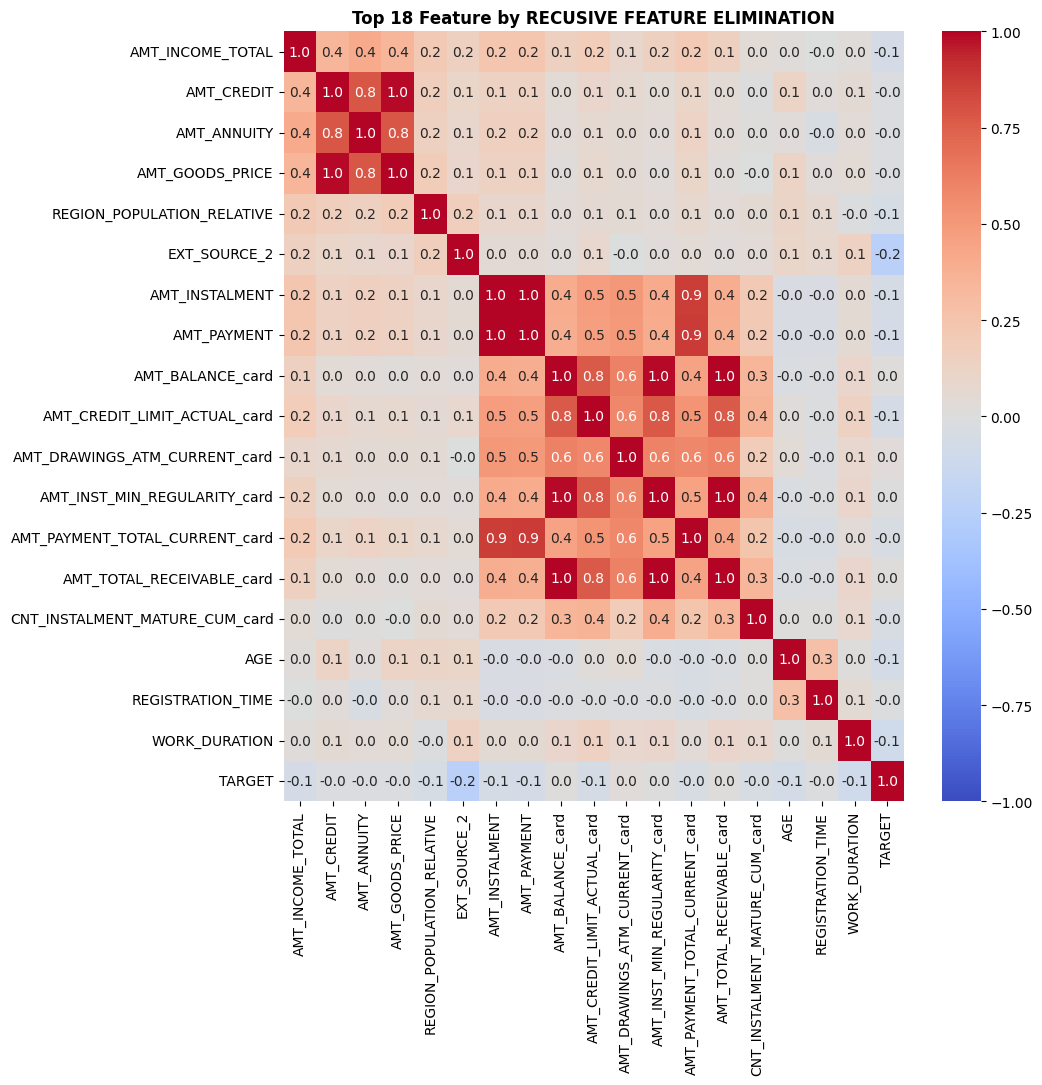

In [57]:
# @title Feature dari RFE (Logistik regression)
data_rfe = Train_balance [['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE', 'EXT_SOURCE_2',
                           'AMT_INSTALMENT','AMT_PAYMENT', 'AMT_BALANCE_card', 'AMT_CREDIT_LIMIT_ACTUAL_card','AMT_DRAWINGS_ATM_CURRENT_card',
                           'AMT_INST_MIN_REGULARITY_card','AMT_PAYMENT_TOTAL_CURRENT_card', 'AMT_TOTAL_RECEIVABLE_card','CNT_INSTALMENT_MATURE_CUM_card',
                           'AGE', 'REGISTRATION_TIME','WORK_DURATION','TARGET']]

test_rfe = test [['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE', 'EXT_SOURCE_2',
                  'AMT_INSTALMENT','AMT_PAYMENT', 'AMT_BALANCE_card', 'AMT_CREDIT_LIMIT_ACTUAL_card','AMT_DRAWINGS_ATM_CURRENT_card',
                  'AMT_INST_MIN_REGULARITY_card','AMT_PAYMENT_TOTAL_CURRENT_card', 'AMT_TOTAL_RECEIVABLE_card','CNT_INSTALMENT_MATURE_CUM_card',
                  'AGE', 'REGISTRATION_TIME','WORK_DURATION']]

plt.figure(figsize=(10,10))
sns.heatmap(data=data_rfe.corr(), annot=True, fmt='.1f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Top 18 Feature by RECUSIVE FEATURE ELIMINATION',fontweight='bold')
plt.show()

## Standarisasi Feature

In [58]:
# @title Standarisasi Feature Hasil RFE
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
numerik = data_rfe.drop(columns='TARGET')
target = data_rfe[['TARGET']]
df_scale_rfe = pd.DataFrame(scale.fit_transform(numerik),columns=numerik.columns, index=numerik.index)
df_scale_rfe = pd.concat([df_scale_rfe, target], axis=1)
df_scale_rfe.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,EXT_SOURCE_2,AMT_INSTALMENT,AMT_PAYMENT,AMT_BALANCE_card,AMT_CREDIT_LIMIT_ACTUAL_card,AMT_DRAWINGS_ATM_CURRENT_card,AMT_INST_MIN_REGULARITY_card,AMT_PAYMENT_TOTAL_CURRENT_card,AMT_TOTAL_RECEIVABLE_card,CNT_INSTALMENT_MATURE_CUM_card,AGE,REGISTRATION_TIME,WORK_DURATION,TARGET
0,0.250536,0.191098,0.106624,0.187718,-0.816789,-2.106642,0.707254,0.721781,0.125694,1.170059,-0.591672,0.384532,0.987368,0.138257,1.719621,0.375109,-0.380306,-0.762075,0
1,0.250536,0.191098,0.106624,0.187718,-0.816789,-2.106642,0.707254,0.721781,0.125694,1.170059,-0.591672,0.384532,0.987368,0.138257,1.719621,0.375109,-0.380306,-0.762075,0
2,0.250536,0.191098,0.106624,0.187718,-0.816789,-2.106642,0.707254,0.721781,0.125694,1.170059,-0.591672,0.384532,0.987368,0.138257,1.719621,0.375109,-0.380306,-0.762075,0
3,0.523574,2.329854,2.134530,2.057736,-1.324929,1.206154,-0.359225,-0.392553,0.362260,1.103846,1.464451,0.101045,-0.572950,0.362457,-0.354813,0.006846,0.271908,1.962306,0
4,0.523574,2.329854,2.134530,2.057736,-1.324929,1.206154,-0.359225,-0.392553,0.362260,1.103846,1.464451,0.101045,-0.572950,0.362457,-0.354813,0.006846,0.271908,1.962306,0


In [ ]:
# @title Melakukan Model Random Forest Classifier pada data Hasil Heatmap

from sklearn.ensemble import RandomForestClassifier

#Melakukan Pemisahan Fitur dan Target
X_train_heatmap = df_cleaned_heatmap.drop(columns='TARGET') # data train berasal dari hasil seleksi feature dengan heatmap
y_train_heatmap = df_cleaned_heatmap['TARGET']

X_test_heatmap = test_data

# Disini saya melakukan training keseluruh data Train(100%) dan melakukan test kepada data test.
random = RandomForestClassifier(random_state=42)
random.fit(X_train_heatmap,y_train_heatmap)
predict = random.predict(X_test_heatmap)
print(predict)

# ----------------------------------------------------------------------------------------------------------------
# Saya akan mencoba untuk melihat hasil confusion matrik untuk data training (df_scale) dengan menggunkan metode validasi silang
y_pred_heatmap = cross_val_predict(random, X_train_heatmap, y_train_heatmap, cv=15)

# Menghitung Confusion Matrik
cm = confusion_matrix(y_train_heatmap,y_pred_heatmap)
print('Confusion MatriX:\n',cm)

plt.figure(figsize=(6 ,4 ))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Menghitung Classification Report untuk metrik lainnya
cr = classification_report(y_train_heatmap, y_pred_heatmap)
print('Classification Report:\n',cr)




[0 0 0 ... 0 0 0]
Confusion MatriX:
 [[246180  26027]
 [    80 272127]]


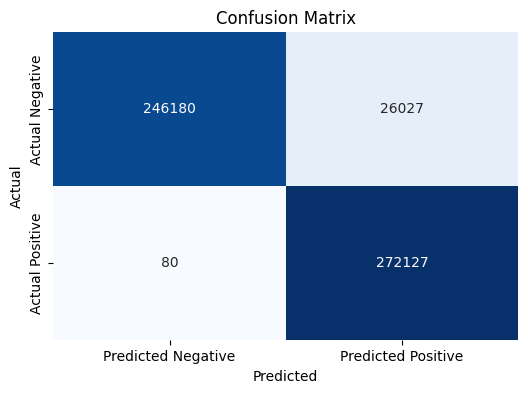

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.90      0.95    272207
           1       0.91      1.00      0.95    272207

    accuracy                           0.95    544414
   macro avg       0.96      0.95      0.95    544414
weighted avg       0.96      0.95      0.95    544414



In [62]:
# @title Melakukan Model Random Forest Classifier pada data Hasil RFE

#Melakukan Pemisahan Fitur dan Target
X_train_rfe = df_scale_rfe.drop(columns='TARGET') # data train berasal dari hasil seleksi feature dengan RFE
y_train_rfe = df_scale_rfe['TARGET']

X_test_rfe = test_rfe

# Disini saya melakukan training keseluruh data Train(100%) dan melakukan test kepada data test.
random = RandomForestClassifier(criterion ='gini', n_estimators= 100, max_depth=50, random_state=42)
random.fit(X_train_rfe,y_train_rfe)
predict = random.predict(X_test_rfe)
print(predict)

# ----------------------------------------------------------------------------------------------------------------
# Saya akan mencoba untuk melihat hasil confusion matrik untuk data training (df_scale) dengan menggunkan metode validasi silang
y_pred_rfe = cross_val_predict(random, X_train_rfe, y_train_rfe, cv=15)

# Menghitung Confusion Matrik
cm = confusion_matrix(y_train_rfe,y_pred_rfe)
print('Confusion MatriX:\n',cm)

plt.figure(figsize=( 6 ,4 ))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Menghitung Classification Report untuk metrik lainnya
cr = classification_report(y_train_rfe, y_pred_rfe)
print('Classification Report:\n',cr)




ROC AUC Score: 0.9998157471647696


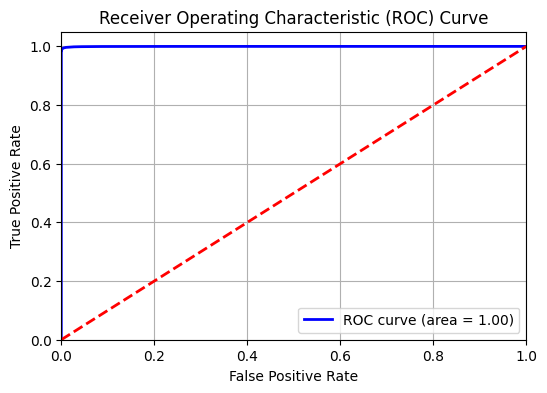

In [63]:
# @title Menampilkan Kurva ROC
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_predict

# Menghitung probabilitas prediksi untuk kelas positif
y_proba_rfe = cross_val_predict(random, X_train_rfe, y_train_rfe, cv=7, method='predict_proba')[:, 1]

# Menghitung ROC AUC score
roc_auc = roc_auc_score(y_train_rfe, y_proba_rfe)
print('ROC AUC Score:', roc_auc)

# Menghitung nilai FPR, TPR, dan thresholds
fpr, tpr, thresholds = roc_curve(y_train_rfe, y_proba_rfe)

# Plotting Kurva ROC
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')  # Memperbaiki kesalahan sintaks
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

Pada dasarnya model Logistik regresion dapat memiliki kinerja baik jika dalam data yang dimiliki tidak mengandung outlier, multikolinearitas, tidak terlalu komplek untuk antara hub dengan fitur - fitur, sehinggal model linier regresion mudah dalam menangkap pola dengan baik. Untuk kasus kali ini penggunaa algoritma Logistik Regression kurang cocok dikarenakan data yang dimiliki cukup KOMPLEK dan Memiliki Outlier yang dimana dalam kasus ini Outlier tidak terlalu berpengaruh dalam bisnis. Sehingga dengan menghapus Outlier pada data dapat menghilangkan insight yang sebenarnya. Oleh sebab itu perlu menggunakan algoritma yang robust dalam data yang memiliki Outlier seperti Random Forest.

Temukan penyebab model linier regresi hasil model tidak cukup baik dibandingkan dengan algoritma lain.
1. apakah didalam data yang dimiliki memiliki multikolinearitas yang dapat menggangu hasil permodelan ?
2. dengan cara apa untuk bisa merepresentasikan data tersebut tidak memiliki  multikolinearitas?
3. adakah penyebab overfitting atau underfitting pada model logistik regresion sehingga menyebabkan turunnya performa dari model tersebut?
4. model logistik regresi memiliki sensitivitas terhadap oulier, apakah dengan penggunaan standarisasi saja sudah cukup untuk menghandel hal tersebut? atau perlu dilakukan handle outlier untuk bisa mendapatkan hasil yang maksimal ?
5. apa fungsi sebenarnya dari sebuah feature important? kapan penggunaan feature important dilakukan, apakah sebelum dilakukan permodelan ? atau setelah dilakukan permodelan ? lalu dari hasil feature importan impact apa yang akan ditimbulkan ?

jawaban:

1. Ya terdapat multikolinearitas pada data yang dimiliki terlihat dari hasil korelasi heatmap. Dengan adanya multikolinearitas pada data ini menyebabkan performa model kurang cukup baik karena koefisien regresi menjadi sangat sensitif dan sulit untuk menginterpretasikan nilai efek individual dari variabel independen.
2. Dapat dengan menggunakan Variance Inflation Factor (VIF), matrik korelasi, Eigenvalues dan Condition Number, Tolerance

In [ ]:
# dikarenakan data yang dimiliki memiliki tujuan analisa untuk prediksi suatu kategori dari sebuah nilai
# maka asumsi sementara algoritma yang cocok untuk kasus ini adalah klasifikasi